In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_server_gai = pd.read_csv('experiment_logs/gaikube/server_stats_msgke_20240630_115907.csv')
df_server_vpa = pd.read_csv('experiment_logs/vpa_gke/server_stats_msgke_20240630_144821.csv')
df_server_ms = pd.read_csv('experiment_logs/ms_gke/server_stats_msgke_20240630_160859.csv')

In [3]:
df_server_ms.head()

,num_moves,num_scalings,cost
0,0,0,4.5
1,2,0,4.5
2,2,0,4.5
3,1,0,4.5
4,1,0,4.5


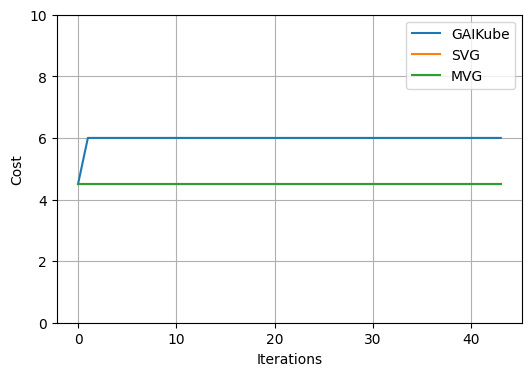

In [142]:
plt.figure(figsize=(6,4))
plt.plot(df_server_gai.index, df_server_gai['cost'], label='GAIKube')
plt.plot(df_server_vpa.index, df_server_vpa['cost'], label='SVG')
plt.plot(df_server_ms.index, df_server_ms['cost'], label='MVG')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.ylim([0,10])
plt.savefig('cost.pdf', format='pdf')
plt.show()

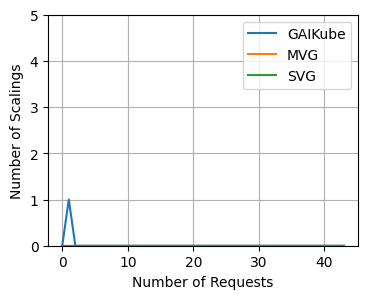

In [141]:
plt.figure(figsize=(4,3))
plt.plot(df_server_gai.index, df_server_gai['num_scalings'], label='GAIKube')
plt.plot(df_server_ms.index, df_server_ms['num_scalings'], label='MVG')
plt.plot(df_server_vpa.index, df_server_vpa['num_scalings'], label='SVG')
#plt.title('num_scalings')
plt.xlabel('Number of Requests')
plt.ylabel('Number of Scalings')
plt.legend()
plt.grid(True)
plt.ylim([0,5])
plt.savefig('cost.pdf', format='pdf')
plt.show()

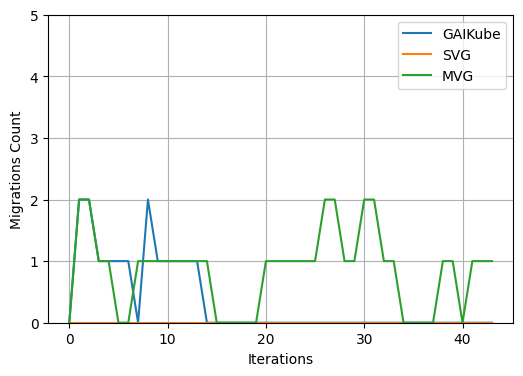

In [140]:
plt.figure(figsize=(6,4))
plt.plot(df_server_gai.index, df_server_gai['num_moves'], label='GAIKube')
plt.plot(df_server_vpa.index, df_server_vpa['num_moves'], label='SVG')
plt.plot(df_server_ms.index, df_server_ms['num_moves'], label='MVG')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Migrations Count')
plt.legend()
plt.grid(True)
plt.ylim([0,5])
plt.savefig('migrations.pdf', format='pdf')
plt.show()

In [59]:
sum(df_server_gai['num_moves'])/df_server_gai.shape[0]

0.3409090909090909

In [60]:
sum(df_server_vpa['num_moves'])/df_server_vpa.shape[0]

0.0

In [63]:
sum(df_server_ms['num_moves'])/df_server_ms.shape[0]

0.8409090909090909

In [67]:
sum(df_server_gai['cost'])/df_server_gai.shape[0]

5.965909090909091

In [66]:
sum(df_server_vpa['cost'])/df_server_vpa.shape[0]

4.5

In [65]:
sum(df_server_ms['cost'])/df_server_ms.shape[0]

4.5

## Nodes Stats ##

In [18]:
df_pred = pd.read_csv('/home/babarali/Extended_ProKube/datasets/bitbrains/times_prediction.csv')
df_pred = df_pred[['ds', 'unique_id', 'timesfm']]
df_pred = df_pred.iloc[1554:1683]

In [19]:
df_nodes_utils_gai = pd.read_csv('experiment_logs/gaikube/nodes_utils_stats_msgke_20240630_115907.csv')
df_nodes_utils_vpa = pd.read_csv('experiment_logs/vpa_gke/nodes_utils_stats_msgke_20240630_144821.csv')
df_nodes_utils_ms = pd.read_csv('experiment_logs/ms_gke/nodes_utils_stats_msgke_20240630_160859.csv')

In [20]:
df_nodes_utils_gai['cpu_usage_percent'] = (df_nodes_utils_gai['cpu_req']/ df_nodes_utils_gai['cpu_alloc'])*100
df_nodes_utils_gai['ram_usage_percent'] = (df_nodes_utils_gai['ram_req']/ df_nodes_utils_gai['ram_alloc'])*100

df_nodes_utils_vpa['cpu_usage_percent'] = (df_nodes_utils_vpa['cpu_req']/ df_nodes_utils_vpa['cpu_alloc'])*100
df_nodes_utils_vpa['ram_usage_percent'] = (df_nodes_utils_vpa['ram_req']/ df_nodes_utils_vpa['ram_alloc'])*100

df_nodes_utils_ms['cpu_usage_percent'] = (df_nodes_utils_ms['cpu_req']/ df_nodes_utils_ms['cpu_alloc'])*100
df_nodes_utils_ms['ram_usage_percent'] = (df_nodes_utils_ms['ram_req']/ df_nodes_utils_ms['ram_alloc'])*100


In [21]:
df_nodes_utils_vpa

,mid,cpu_cap,ram_cap,cpu_alloc,ram_alloc,cpu_req,ram_req,cpu_remain,ram_remain,cpu_usage_percent,ram_usage_percent
0,0,2,4,1930,2873,1759,2591,171,282,91.139896,90.184476
1,1,4,8,3920,6176,3572,2836,348,3340,91.122449,45.919689
2,2,6,8,5915,6175,568,887,5347,5288,9.602705,14.364372
3,0,2,4,1930,2873,1759,2591,171,282,91.139896,90.184476
4,1,4,8,3920,6176,3572,2836,348,3340,91.122449,45.919689
...,...,...,...,...,...,...,...,...,...,...,...
127,1,4,8,3920,6176,3572,2836,348,3340,91.122449,45.919689
128,2,6,8,5915,6175,568,887,5347,5288,9.602705,14.364372
129,0,2,4,1930,2873,1759,2591,171,282,91.139896,90.184476
130,1,4,8,3920,6176,3572,2836,348,3340,91.122449,45.919689


In [22]:
unique_mids = df_nodes_utils_gai['mid'].unique()

# Create a dictionary to store DataFrames for each unique 'mid'
df_dict_gai = {mid: df_nodes_utils_gai[df_nodes_utils_gai['mid'] == mid].reset_index(drop=True) for mid in unique_mids}
df_dict_vpa = {mid: df_nodes_utils_vpa[df_nodes_utils_vpa['mid'] == mid].reset_index(drop=True) for mid in unique_mids}
df_dict_ms = {mid: df_nodes_utils_ms[df_nodes_utils_ms['mid'] == mid].reset_index(drop=True) for mid in unique_mids}

In [23]:
df_dict_gai[0].head()

,mid,cpu_cap,ram_cap,cpu_alloc,ram_alloc,cpu_req,ram_req,cpu_remain,ram_remain,cpu_usage_percent,ram_usage_percent
0,0,2,4,1930,2873,259,591,1671,2282,13.419689,20.570832
1,0,2,4,1930,2873,259,591,1671,2282,13.419689,20.570832
2,0,2,4,1930,2873,259,591,1671,2282,13.419689,20.570832
3,0,2,4,1930,2873,259,591,1671,2282,13.419689,20.570832
4,0,2,4,1930,2873,259,591,1671,2282,13.419689,20.570832


In [24]:
df_pred2 = df_pred[df_pred['unique_id']==2].reset_index(drop=True)
df_pred4 = df_pred[df_pred['unique_id']==4].reset_index(drop=True)
df_pred6 = df_pred[df_pred['unique_id']==6].reset_index(drop=True)

df_pred2

,ds,unique_id,timesfm
0,2013-09-11 09:50:00,2,70.743904
1,2013-09-11 09:55:00,2,69.392440
2,2013-09-11 10:00:00,2,68.575750
3,2013-09-11 10:05:00,2,67.589910
4,2013-09-11 10:10:00,2,73.271800
5,2013-09-11 10:15:00,2,73.402440
6,2013-09-11 10:20:00,2,72.894646
7,2013-09-11 10:25:00,2,72.071625
8,2013-09-11 10:30:00,2,71.410770
9,2013-09-11 10:35:00,2,70.649100


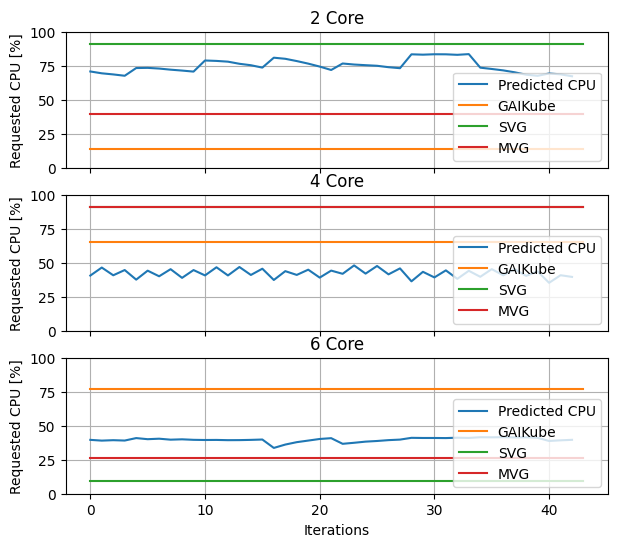

In [139]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(7,6), sharex=True)

ax1.plot(df_pred2.index, df_pred2['timesfm'], label='Predicted CPU')
ax1.plot(df_dict_gai[0].index, df_dict_gai[0]['cpu_usage_percent'], label='GAIKube')
ax1.plot(df_dict_vpa[0].index, df_dict_vpa[0]['cpu_usage_percent'], label='SVG')
ax1.plot(df_dict_ms[0].index, df_dict_ms[0]['cpu_usage_percent'], label='MVG')
ax1.set_title('2 Core')
#ax1.set_xlabel('Number of Requests')
ax1.set_ylabel('Requested CPU [%]')
ax1.legend(loc='lower right')
ax1.grid(True)
ax1.set_ylim([0,100])


ax2.plot(df_pred4.index, df_pred4['timesfm'], label='Predicted CPU')
ax2.plot(df_dict_gai[1].index, df_dict_gai[1]['cpu_usage_percent'], label='GAIKube')
ax2.plot(df_dict_vpa[1].index, df_dict_vpa[1]['cpu_usage_percent'], label='SVG')
ax2.plot(df_dict_ms[1].index, df_dict_ms[1]['cpu_usage_percent'], label='MVG')
ax2.set_title('4 Core')
#ax2.set_xlabel('Number of Requests')
ax2.set_ylabel('Requested CPU [%]')
ax2.legend(loc='lower right')
ax2.grid(True)
ax2.set_ylim([0,100])

ax3.plot(df_pred6.index, df_pred6['timesfm'], label='Predicted CPU')
ax3.plot(df_dict_gai[2].index, df_dict_gai[2]['cpu_usage_percent'], label='GAIKube')
ax3.plot(df_dict_vpa[2].index, df_dict_vpa[2]['cpu_usage_percent'], label='SVG')
ax3.plot(df_dict_ms[2].index, df_dict_ms[2]['cpu_usage_percent'], label='MVG')
ax3.set_title('6 Core')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Requested CPU [%]')
ax3.legend(loc='lower right')
#ax2.legend(loc='upper right')
ax3.grid(True)
ax3.set_ylim([0,100])

#plt.setp(ax3.get_xticklabels(), rotation=30, ha='right')
plt.savefig('cpu_usage.pdf', format='pdf')
plt.show()

In [157]:
df_dict_gai[1]

,mid,cpu_cap,ram_cap,cpu_alloc,ram_alloc,cpu_req,ram_req,cpu_remain,ram_remain,cpu_usage_percent,ram_usage_percent
1,1,4,8,3920,6176,2572,2836,1348,3340,65.612245,45.919689
4,1,4,8,3920,6176,2572,2836,1348,3340,65.612245,45.919689
7,1,4,8,3920,6176,2572,2836,1348,3340,65.612245,45.919689
10,1,4,8,3920,6176,2572,2836,1348,3340,65.612245,45.919689
13,1,4,8,3920,6176,2572,2836,1348,3340,65.612245,45.919689
16,1,4,8,3920,6176,2572,2836,1348,3340,65.612245,45.919689
19,1,4,8,3920,6176,2572,2836,1348,3340,65.612245,45.919689
22,1,4,8,3920,6176,2572,2836,1348,3340,65.612245,45.919689
25,1,4,8,3920,6176,2572,2836,1348,3340,65.612245,45.919689
28,1,4,8,3920,6176,2572,2836,1348,3340,65.612245,45.919689


In [68]:
df_dict_ms[2]

,mid,cpu_cap,ram_cap,cpu_alloc,ram_alloc,cpu_req,ram_req,cpu_remain,ram_remain,cpu_usage_percent,ram_usage_percent
2,2,6,8,5915,6175,567,871,5348,5304,9.585799,14.105263
5,2,6,8,5915,6175,567,871,5348,5304,9.585799,14.105263
8,2,6,8,5915,6175,567,871,5348,5304,9.585799,14.105263
11,2,6,8,5915,6175,567,871,5348,5304,9.585799,14.105263
14,2,6,8,5915,6175,567,871,5348,5304,9.585799,14.105263
17,2,6,8,5915,6175,567,871,5348,5304,9.585799,14.105263
20,2,6,8,5915,6175,567,871,5348,5304,9.585799,14.105263
23,2,6,8,5915,6175,567,871,5348,5304,9.585799,14.105263
26,2,6,8,5915,6175,567,871,5348,5304,9.585799,14.105263
29,2,6,8,5915,6175,567,871,5348,5304,9.585799,14.105263


## Client SLA Stats


In [35]:
model_accuracies = {
    'yolov5n': 0.457,
    'yolov5s': 0.568,
    'yolov5m': 0.641
}
df_client_gai = pd.read_csv('experiment_logs/gaikube/clients_stats_msgke_20240630_115907.csv')
df_client_vpa = pd.read_csv('experiment_logs/vpa_gke/clients_stats_msgke_20240630_144821.csv')
df_client_ms = pd.read_csv('experiment_logs/ms_gke/clients_stats_msgke_20240630_160859.csv')
df_client_gai.shape, df_client_vpa.shape, df_client_ms.shape

((1748, 9), (1692, 9), (1744, 9))

In [36]:
df_client_gai= df_client_gai[['cid', 'model_name', 'processing_delay (ms)', 'core']]
df_client_vpa = df_client_vpa[['cid', 'model_name', 'processing_delay (ms)', 'core']]
df_client_ms = df_client_ms[['cid', 'model_name', 'processing_delay (ms)', 'core']]

df_client_gai['model_accuracy'] = df_client_gai['model_name'].map(model_accuracies)
df_client_vpa['model_accuracy'] = df_client_vpa['model_name'].map(model_accuracies)
df_client_ms['model_accuracy'] = df_client_ms['model_name'].map(model_accuracies)

In [241]:
# total_traffic = df_client_gai.groupby('core').size()
# traffic_by_core_model = df_client_gai.groupby(['core', 'model_name']).size().unstack(fill_value=0)
# average_accuracies = {}
# for core in traffic_by_core_model.index:
#     total_traffic_core = total_traffic[core]
#     weighted_sum = 0
#     for model in traffic_by_core_model.columns:
#         traffic_by_model = traffic_by_core_model.loc[core, model]
#         if traffic_by_model > 0:
#             model_accuracy = model_accuracies[model]
#             weighted_sum += (traffic_by_model / total_traffic_core) * model_accuracy
#     average_accuracies[core] = weighted_sum * 100  # Convert to percentage
# average_accuracies

In [37]:
df_client_gai['core'].unique()

array([ 500, 1000, 2000])

In [38]:
df_client_gai[df_client_gai['core']==1000]['model_name'].unique()

array(['yolov5s', 'yolov5m', 'yolov5n'], dtype=object)

In [39]:
df_client_ms[df_client_ms['processing_delay (ms)'] > 700].groupby('core').size()

core
500     218
1000     46
2000      3
dtype: int64

In [40]:
df_client_ms['core'].value_counts()

core
1000    872
500     436
2000    436
Name: count, dtype: int64

In [41]:
df_client_ms[df_client_ms['cid']==1]

,cid,model_name,processing_delay (ms),core,model_accuracy
1,1,yolov5s,427.858591,1000,0.568
5,1,yolov5s,678.848028,1000,0.568
9,1,yolov5s,451.465607,1000,0.568
13,1,yolov5s,667.403936,1000,0.568
17,1,yolov5s,399.151087,1000,0.568
...,...,...,...,...,...
1725,1,yolov5n,325.529575,1000,0.457
1729,1,yolov5n,593.114853,1000,0.457
1733,1,yolov5n,298.827648,1000,0.457
1737,1,yolov5n,598.983765,1000,0.457


In [42]:
df_client_gai

,cid,model_name,processing_delay (ms),core,model_accuracy
0,0,yolov5n,634.610653,500,0.457
1,1,yolov5s,550.533772,1000,0.568
2,2,yolov5s,487.960815,1000,0.568
3,3,yolov5m,554.638147,2000,0.641
4,0,yolov5n,913.888931,500,0.457
...,...,...,...,...,...
1743,3,yolov5m,676.305532,2000,0.641
1744,0,yolov5m,664.591551,2000,0.641
1745,1,yolov5s,567.901611,1000,0.568
1746,2,yolov5s,581.035376,1000,0.568


In [43]:
df_client_vpa

,cid,model_name,processing_delay (ms),core,model_accuracy
0,0,yolov5n,472.021580,500,0.457
1,1,yolov5s,466.292620,1000,0.568
2,2,yolov5s,465.268612,1000,0.568
3,3,yolov5m,488.454103,2000,0.641
4,0,yolov5n,926.285982,500,0.457
...,...,...,...,...,...
1687,3,yolov5m,632.038355,2000,0.641
1688,0,yolov5n,863.586664,500,0.457
1689,1,yolov5s,413.468599,1000,0.568
1690,2,yolov5s,356.239796,1000,0.568


In [72]:
def violation_calculator(df, threshold):
    violations = df[df['processing_delay (ms)'] > threshold]
    return (violations.shape[0]/df.shape[0])*100

# latency_bound = 700
# vr = violation_calculator(df_client_vpa,latency_bound)

def per_cid_violation_calculator(df, threshold):
    result = df.groupby('cid').apply(lambda x: violation_calculator(x, threshold)).reset_index(name='SLA_violation_percentage')
    return result

latency_bound = 700
vr_gai= per_cid_violation_calculator(df_client_gai, latency_bound)
vr_vpa = per_cid_violation_calculator(df_client_vpa, latency_bound)
vr_ms = per_cid_violation_calculator(df_client_ms, latency_bound)
vr_gai

,cid,SLA_violation_percentage
0,0,1.372998
1,1,2.974828
2,2,8.237986
3,3,1.144165


In [73]:
vr_vpa

,cid,SLA_violation_percentage
0,0,49.881797
1,1,8.747045
2,2,0.000000
3,3,0.472813


In [74]:
vr_ms

,cid,SLA_violation_percentage
0,0,50.000000
1,1,3.899083
2,2,6.651376
3,3,0.688073


In [76]:
vr_gai['vpa_violations'] = vr_vpa['SLA_violation_percentage']
vr_gai['ms_violations'] = vr_ms['SLA_violation_percentage']
vr_gai.rename(columns={"SLA_violation_percentage": "gai_violations"}, inplace=True)
vr_gai

,cid,gai_violations,vpa_violations,ms_violations
0,0,1.372998,49.881797,50.000000
1,1,2.974828,8.747045,3.899083
2,2,8.237986,0.000000,6.651376
3,3,1.144165,0.472813,0.688073


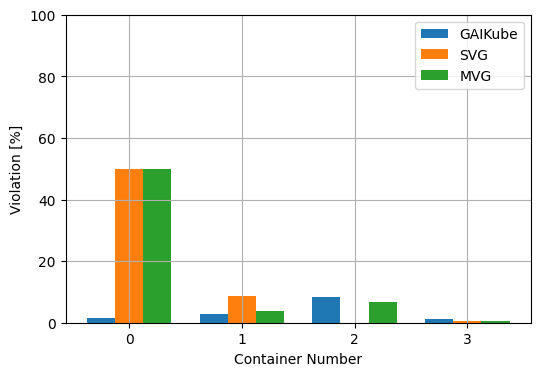

In [138]:
fig, ax = plt.subplots(figsize=(6, 4))

# Set the bar width
bar_width = 0.25

# Set positions for the bars
r1 = range(len(vr_gai['cid']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
ax.bar(r1, vr_gai['gai_violations'], width=bar_width, label='GAIKube')
ax.bar(r2, vr_gai['vpa_violations'], width=bar_width, label='SVG')
ax.bar(r3, vr_gai['ms_violations'], width=bar_width, label='MVG')

# Add labels and title
ax.set_xlabel('Container Number')
ax.set_ylabel('Violation [%]')
#ax.set_title('Violations per CID')
ax.set_xticks([r + bar_width for r in range(len(vr_gai['cid']))])
ax.set_xticklabels(vr_gai['cid'])

ax.grid()
ax.legend()
plt.ylim([0,100])
plt.savefig('per_contaier_violations.pdf', format='pdf')
# Show plot
plt.show()

In [47]:
violation_calculator(df_client_gai, latency_bound)

3.4324942791762014

In [48]:
violation_calculator(df_client_vpa, latency_bound)

14.775413711583923

In [49]:
violation_calculator(df_client_ms, latency_bound)

15.309633027522937

## Accuracy Calculator

In [98]:
df_client_vpa.head(12)

,cid,model_name,processing_delay (ms),core,model_accuracy
0,0,yolov5n,472.021580,500,0.457
1,1,yolov5s,466.292620,1000,0.568
2,2,yolov5s,465.268612,1000,0.568
3,3,yolov5m,488.454103,2000,0.641
4,0,yolov5n,926.285982,500,0.457
5,1,yolov5s,674.696922,1000,0.568
6,2,yolov5s,601.025820,1000,0.568
7,3,yolov5m,628.035069,2000,0.641
8,0,yolov5n,328.474998,500,0.457
9,1,yolov5s,496.792078,1000,0.568


In [101]:
acc_cid_gai = df_client_gai.groupby('cid')['model_accuracy'].mean().reset_index()
acc_cid_gai

,cid,model_accuracy
0,0,0.638895
1,1,0.560105
2,2,0.568773
3,3,0.641000


In [100]:
acc_cid_vpa = df_client_vpa.groupby('cid')['model_accuracy'].mean().reset_index()
acc_cid_vpa.columns = ['cid', 'vpa_accuracy']
acc_cid_vpa

,cid,vpa_accuracy
0,0,0.457
1,1,0.568
2,2,0.568
3,3,0.641


In [97]:
acc_cid_ms = df_client_ms.groupby('cid')['model_accuracy'].mean().reset_index()
acc_cid_ms.columns = ['cid', 'ms_accuracy']
acc_cid_ms

,cid,ms_accuracy
0,0,0.457000
1,1,0.546106
2,2,0.543961
3,3,0.641000


In [334]:
traffic_by_core_model = df_client_ms.groupby(['cid', 'model_name']).size().unstack(fill_value=0)

In [335]:
traffic_by_core_model

model_name,yolov5m,yolov5n,yolov5s
cid,,,
0,0,436,0
1,0,86,350
2,10,101,325
3,436,0,0


In [104]:
total_traffic = df_client_gai.groupby('cid').size()
traffic_by_core_model = df_client_gai.groupby(['cid', 'model_name']).size().unstack(fill_value=0)
average_accuracies = {}
for cid in traffic_by_core_model.index:
    total_traffic_core = total_traffic[cid]
    weighted_sum = 0
    for model in traffic_by_core_model.columns:
        traffic_by_model = traffic_by_core_model.loc[cid, model]
        if traffic_by_model > 0:
            model_accuracy = model_accuracies[model]
            weighted_sum += (traffic_by_model / total_traffic_core) * model_accuracy
    average_accuracies[cid] = weighted_sum * 100  # Convert to percentage

gai_acc = pd.DataFrame(list(average_accuracies.items()), columns=['cid', 'gai_acc'])

gai_acc

,cid,gai_acc
0,0,63.889474
1,1,56.010526
2,2,56.877346
3,3,64.100000


In [105]:
# Calculate average accuracy per cid
total_traffic = df_client_vpa.groupby('cid').size()
traffic_by_core_model = df_client_vpa.groupby(['cid', 'model_name']).size().unstack(fill_value=0)
average_accuracies = {}
for cid in traffic_by_core_model.index:
    total_traffic_cid = traffic_by_core_model.loc[cid].sum()
    weighted_sum = 0
    for model in traffic_by_core_model.columns:
        traffic_by_model = traffic_by_core_model.loc[cid, model]
        if traffic_by_model > 0:
            model_accuracy = model_accuracies[model]
            weighted_sum += (traffic_by_model / total_traffic_cid) * model_accuracy
    average_accuracies[cid] = weighted_sum * 100  # Convert to percentage

# Convert the result to a dataframe
vpa_acc = pd.DataFrame(list(average_accuracies.items()), columns=['cid', 'vpa_acc'])

vpa_acc

,cid,vpa_acc
0,0,45.7
1,1,56.8
2,2,56.8
3,3,64.1


In [106]:
# Calculate average accuracy per cid
total_traffic = df_client_ms.groupby('cid').size()
traffic_by_core_model = df_client_ms.groupby(['cid', 'model_name']).size().unstack(fill_value=0)
average_accuracies = {}
for cid in traffic_by_core_model.index:
    total_traffic_cid = traffic_by_core_model.loc[cid].sum()
    weighted_sum = 0
    for model in traffic_by_core_model.columns:
        traffic_by_model = traffic_by_core_model.loc[cid, model]
        if traffic_by_model > 0:
            model_accuracy = model_accuracies[model]
            weighted_sum += (traffic_by_model / total_traffic_cid) * model_accuracy
    average_accuracies[cid] = weighted_sum * 100  # Convert to percentage

# Convert the result to a dataframe
ms_acc = pd.DataFrame(list(average_accuracies.items()), columns=['cid', 'ms_acc'])
ms_acc

,cid,ms_acc
0,0,45.700000
1,1,54.610550
2,2,54.396101
3,3,64.100000


In [108]:
gai_acc['vpa_acc'] = vpa_acc['vpa_acc']
gai_acc['ms_acc'] = ms_acc['ms_acc']
gai_acc

,cid,gai_acc,vpa_acc,ms_acc
0,0,63.889474,45.7,45.700000
1,1,56.010526,56.8,54.610550
2,2,56.877346,56.8,54.396101
3,3,64.100000,64.1,64.100000


In [114]:
min(model_accuracies.values())*100, max(model_accuracies.values())*100

(45.7, 64.1)

In [126]:
sum(gai_acc['gai_acc'])/gai_acc.shape[0]

60.21933638443936

In [127]:
sum(gai_acc['vpa_acc'])/gai_acc.shape[0]

55.85

In [128]:
sum(gai_acc['ms_acc'])/gai_acc.shape[0]

54.7016628440367

In [125]:
gai_acc.shape

(4, 4)

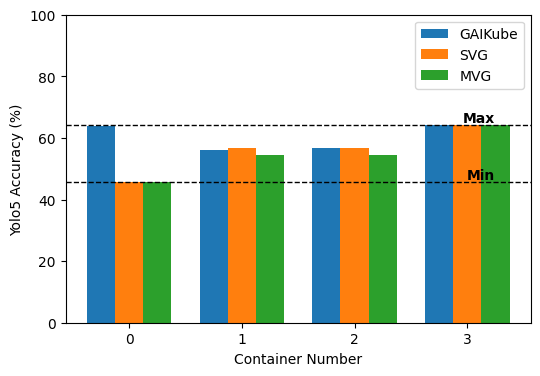

In [137]:
fig, ax = plt.subplots(figsize=(6, 4))

# Set the bar width
bar_width = 0.25

# Set positions for the bars
r1 = range(len(gai_acc['cid']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
ax.bar(r1, gai_acc['gai_acc'],  width=bar_width, label='GAIKube')
ax.bar(r2, gai_acc['vpa_acc'],  width=bar_width, label='SVG')
ax.bar(r3, gai_acc['ms_acc'],  width=bar_width, label='MVG')

# Add labels and title
ax.set_xlabel('Container Number')
ax.set_ylabel('Yolo5 Accuracy (%)')
#ax.set_title('Model Accuracies per CID')
ax.set_xticks([r + bar_width for r in range(len(gai_acc['cid']))])
ax.set_xticklabels(gai_acc['cid'])

# Add legend
ax.legend()

# Add horizontal lines
# Add horizontal lines
min_line = 45.7
max_line = 64.1
ax.axhline(y=min_line, color='black', linestyle='--', linewidth=1)
ax.axhline(y=max_line, color='black', linestyle='--', linewidth=1)

# Add labels to the horizontal lines
ax.text(len(gai_acc['cid']) - 0.5, min_line, 'Min', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10, fontweight='bold')
ax.text(len(gai_acc['cid']) - 0.5, max_line, 'Max', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10, fontweight='bold')


#plt.grid()
plt.ylim([0,100])
plt.savefig('yolo_mean_acc.pdf', format='pdf')
# Show plot
plt.show()